# Iris Flower Classification


## Problem: Is there a linear separation between the varieties of Iris flower based on their dimensions?

### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('data/irisdata.csv', header=None, names=['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class'])

#### Shuffle the order of the records randomly and then take a look at the first 10 records. Shuffling helps to make our sample a little more representative of the whole dataset.

In [3]:
df = df.sample(frac=1)

df.head(10)

,sep_len,sep_wid,pet_len,pet_wid,class
143,6.8,3.2,5.9,2.3,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
139,6.9,3.1,5.4,2.1,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor


### Data Cleaning

#### We know that the whole record set is of Iris flowers, so let's remove the 'Iris-' part of the name in the [class] field.

In [4]:
df['class'] = df['class'].str[5:]

df.head(10)

,sep_len,sep_wid,pet_len,pet_wid,class
143,6.8,3.2,5.9,2.3,virginica
82,5.8,2.7,3.9,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
50,7.0,3.2,4.7,1.4,versicolor
139,6.9,3.1,5.4,2.1,virginica
118,7.7,2.6,6.9,2.3,virginica
33,5.5,4.2,1.4,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
57,4.9,2.4,3.3,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor


### Feature Engineering

#### Adding another 2 columns to get petal and sepal dimensional ratios. To be used later.

In [5]:
df['sep_rat'] = df['sep_len'] / df['sep_wid']
df['pet_rat'] = df['pet_len'] / df['pet_wid']
df.head(10)

,sep_len,sep_wid,pet_len,pet_wid,class,sep_rat,pet_rat
143,6.8,3.2,5.9,2.3,virginica,2.125000,2.565217
82,5.8,2.7,3.9,1.2,versicolor,2.148148,3.250000
18,5.7,3.8,1.7,0.3,setosa,1.500000,5.666667
50,7.0,3.2,4.7,1.4,versicolor,2.187500,3.357143
139,6.9,3.1,5.4,2.1,virginica,2.225806,2.571429
118,7.7,2.6,6.9,2.3,virginica,2.961538,3.000000
33,5.5,4.2,1.4,0.2,setosa,1.309524,7.000000
128,6.4,2.8,5.6,2.1,virginica,2.285714,2.666667
57,4.9,2.4,3.3,1.0,versicolor,2.041667,3.300000
68,6.2,2.2,4.5,1.5,versicolor,2.818182,3.000000


### Visualization

#### Separating our flower data into separate buckets for each variety

In [6]:
df_setosa = df.loc[df['class'] == 'setosa']
df_versicolor = df.loc[df['class'] == 'versicolor']
df_virginica = df.loc[df['class'] == 'virginica']

#### Retrieving the limits of our data

In [7]:
min_sep_len = df['sep_len'].min()
min_sep_wid = df['sep_wid'].min()
min_pet_len = df['pet_len'].min()
min_pet_wid = df['pet_wid'].min()
max_sep_len = df['sep_len'].max()
max_sep_wid = df['sep_wid'].max()
max_pet_len = df['pet_len'].max()
max_pet_wid = df['pet_wid'].max()

#### Scatterplots

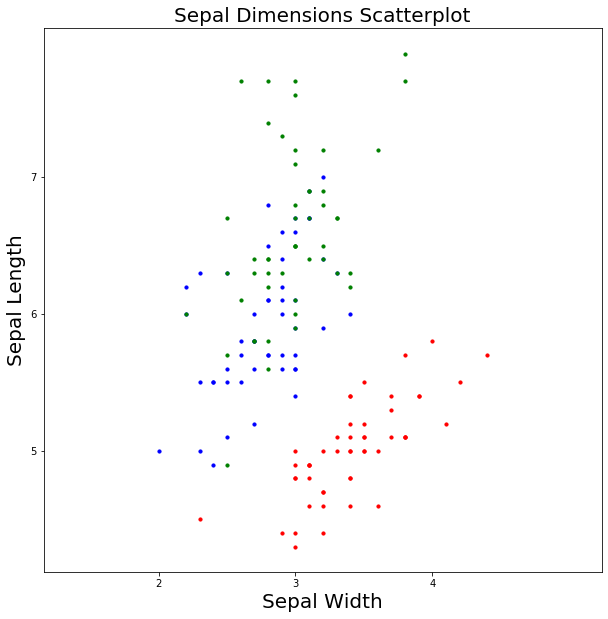

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df_setosa.sep_wid, df_setosa.sep_len, s=10, color='red')
plt.scatter(df_versicolor.sep_wid, df_versicolor.sep_len, s=10, color='blue')
plt.scatter(df_virginica.sep_wid, df_virginica.sep_len, s=10, color='green')
plt.xlabel('Sepal Width', fontsize=20)
plt.ylabel('Sepal Length', fontsize=20)
plt.title('Sepal Dimensions Scatterplot', fontsize=20)
plt.xticks(np.arange(math.floor(min_sep_wid), math.ceil(max_sep_wid), 1))
plt.yticks(np.arange(math.floor(min_sep_len), math.ceil(max_sep_len), 1))
plt.axis('equal');

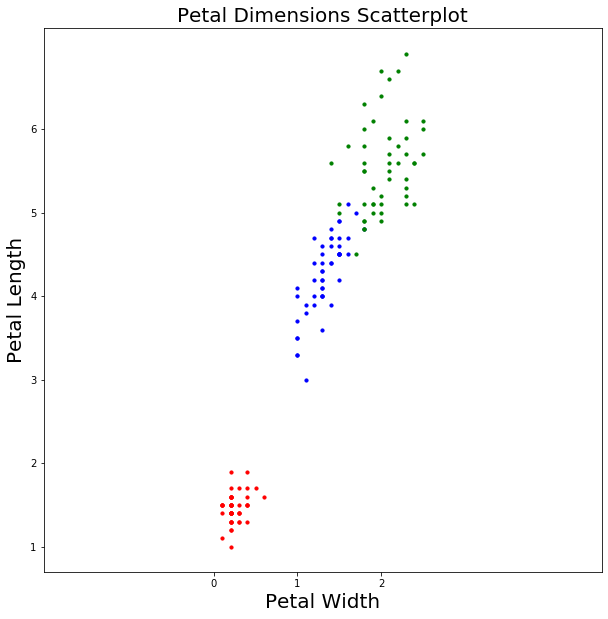

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df_setosa.pet_wid, df_setosa.pet_len, s=10, color='red')
plt.scatter(df_versicolor.pet_wid, df_versicolor.pet_len, s=10, color='blue')
plt.scatter(df_virginica.pet_wid, df_virginica.pet_len, s=10, color='green')
plt.xlabel('Petal Width', fontsize=20)
plt.ylabel('Petal Length', fontsize=20)
plt.title('Petal Dimensions Scatterplot', fontsize=20)
plt.xticks(np.arange(math.floor(min_pet_wid), math.ceil(max_pet_wid), 1))
plt.yticks(np.arange(math.floor(min_pet_len), math.ceil(max_pet_len), 1))
plt.axis('equal');

At first glance, it seems that Virginica and Versicolor varieties are quite similiar dimensionally, while the Setosa appears to deviate quite a bit. The sepal of the Setosa tends to be both wider and shorter than the other two classes; meanwhile the petal of the Setosa is just plain smaller in both dimensions than the other two classes.

Let's take one more look at the distribution of measurements of the versicolor and virginica classes to see if we can discern a difference visually

#### Boxplots

In [10]:
df_nosetosa = df.loc[df['class'] != 'setosa']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11eabe150>,
      dtype=object)

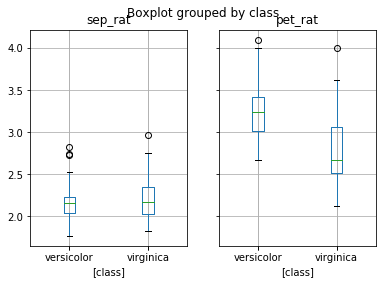

In [11]:
df_nosetosa.boxplot(column=['sep_rat', 'pet_rat'], by=['class'])

<Figure size 1080x720 with 0 Axes>

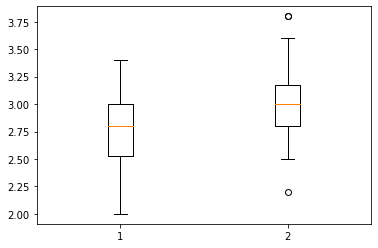

In [12]:
plt.figure(figsize=(15,10))
fig, ax = plt.subplots()

ax.boxplot([df_versicolor['sep_wid'], df_virginica['sep_wid']])

plt.show()

Virginica and Versicolor seem to overlap quite a bit in distribution. However, from the data set that we have, we can say with modest confidence that sepal shape seems to be quite similar, but there is an appreciable difference in petal shape. Versicolor skews a bit longer/narrower in shape as compared to Virginica.

While only graphical in nature, this analysis shows that there is a linear separation between the Setosa variety of Iris from the other two. This can be seen in the first two plots where you could draw a physical line between the Setosa cluster of data points and the other two varieties' data points. Virginica and Versicolor overlap in distribution strongly enough that one cannot draw a linear separation between those two varieties.